In [2]:
print('Importing packages...')
from datetime import datetime
import numpy as np
import pandas as pd
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

Importing packages...


In [10]:
print('Reading data...')
dataTrain = pd.read_csv('ML_Artivatic_dataset/train_indessa.csv')
dataTest = pd.read_csv('ML_Artivatic_dataset/test_indessa.csv')

Reading data...


In [11]:
dataTrain.head(5)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [12]:
'''
Data transformation/cleanup
Strip off textual parts, represent values as numeric values
it makes sense. Convert the datatype to numeric.
'''
print('Transform: term...')
dataTrain['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
dataTest['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
dataTrain['term'] = pd.to_numeric(dataTrain['term'], errors='coerce')
dataTest['term'] = pd.to_numeric(dataTest['term'], errors='coerce')

print('Transform: emp_length...')
dataTrain['emp_length'].replace('n/a', '0', inplace=True)
dataTrain['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
dataTrain['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
dataTrain['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
dataTrain['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
dataTest['emp_length'].replace('n/a', '0', inplace=True)
dataTest['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
dataTest['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
dataTest['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
dataTest['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
dataTrain['emp_length'] = pd.to_numeric(dataTrain['emp_length'], errors='coerce')
dataTest['emp_length'] = pd.to_numeric(dataTest['emp_length'], errors='coerce')

print('Transform: last_week_pay...')
dataTrain['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
dataTest['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
dataTrain['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)
dataTest['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)
dataTrain['last_week_pay'] = pd.to_numeric(dataTrain['last_week_pay'], errors='coerce')
dataTest['last_week_pay'] = pd.to_numeric(dataTest['last_week_pay'], errors='coerce')

print('Transform: sub_grade...')
dataTrain['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
dataTrain['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
dataTrain['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
dataTrain['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
dataTrain['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
dataTrain['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
dataTrain['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)
dataTest['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
dataTest['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
dataTest['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
dataTest['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
dataTest['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
dataTest['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
dataTest['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)
dataTrain['sub_grade'] = pd.to_numeric(dataTrain['sub_grade'], errors='coerce')
dataTest['sub_grade'] = pd.to_numeric(dataTest['sub_grade'], errors='coerce')

print('Transform done.')

Transform: term...
Transform: emp_length...
Transform: last_week_pay...
Transform: sub_grade...
Transform done.


In [13]:
dataTrain.head(5)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36,,19.19,E,43,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26.0,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36,BAT1586599,10.99,B,14,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9.0,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36,BAT1586599,7.26,A,4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9.0,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36,BAT4808022,19.72,D,35,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135.0,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36,BAT2833642,10.64,B,12,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96.0,0.0,0.0,47159.0,47033.0,0


In [14]:
'''
Missing values imputation
'''
cols = ['term', 'loan_amnt', 'funded_amnt', 'last_week_pay', 'int_rate', 'sub_grade', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'emp_length']
for col in cols:
    print('Imputation with Median: %s' % (col))
    dataTrain[col].fillna(dataTrain[col].median(), inplace=True)
    dataTest[col].fillna(dataTest[col].median(), inplace=True)

cols = ['acc_now_delinq', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med']
for col in cols:
    print('Imputation with Zero: %s' % (col))
    dataTrain[col].fillna(0, inplace=True)
    dataTest[col].fillna(0, inplace=True)

print('Missing value imputation done.')

Imputation with Median: term
Imputation with Median: loan_amnt
Imputation with Median: funded_amnt
Imputation with Median: last_week_pay
Imputation with Median: int_rate
Imputation with Median: sub_grade
Imputation with Median: annual_inc
Imputation with Median: dti
Imputation with Median: mths_since_last_delinq
Imputation with Median: mths_since_last_record
Imputation with Median: open_acc
Imputation with Median: revol_bal
Imputation with Median: revol_util
Imputation with Median: total_acc
Imputation with Median: total_rec_int
Imputation with Median: mths_since_last_major_derog
Imputation with Median: tot_coll_amt
Imputation with Median: tot_cur_bal
Imputation with Median: total_rev_hi_lim
Imputation with Median: emp_length
Imputation with Zero: acc_now_delinq
Imputation with Zero: total_rec_late_fee
Imputation with Zero: recoveries
Imputation with Zero: collection_recovery_fee
Imputation with Zero: collections_12_mths_ex_med
Missing value imputation done.


In [15]:
dataTrain.head(5)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36,,19.19,E,43,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26.0,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36,BAT1586599,10.99,B,14,Human Resources Specialist,...,0.0,44.0,INDIVIDUAL,NaN,9.0,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36,BAT1586599,7.26,A,4,Driver,...,0.0,44.0,INDIVIDUAL,NaN,9.0,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36,BAT4808022,19.72,D,35,Us office of Personnel Management,...,0.0,44.0,INDIVIDUAL,NaN,135.0,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36,BAT2833642,10.64,B,12,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,44.0,INDIVIDUAL,NaN,96.0,0.0,0.0,47159.0,47033.0,0


In [16]:
'''
Feature Engineering
'''

# Separating the member_id column of test dataframe to help create a csv after predictions
test_member_id = pd.DataFrame(dataTest['member_id'])


# Creating target variable pandas series from train dataframe, this will be used by cross validation to calculate
# the accuracy of the model
train_target = pd.DataFrame(dataTrain['loan_status'])


# It's good to create a copy of train and test dataframes. this way we can play around different features as we tune the
# performance of the classifier with important features
selected_cols = ['member_id', 'emp_length', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'sub_grade', 'int_rate', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'mths_since_last_major_derog', 'last_week_pay', 'tot_cur_bal', 'total_rev_hi_lim', 'tot_coll_amt', 'recoveries', 'collection_recovery_fee', 'term', 'acc_now_delinq', 'collections_12_mths_ex_med']
finalTrain = dataTrain[selected_cols]
finalTest = dataTest[selected_cols]

# How big the loan a person has taken with respect to his earnings, annual income to loan amount ratio
finalTrain['loan_to_income'] = finalTrain['annual_inc']/finalTrain['funded_amnt_inv']
finalTest['loan_to_income'] = finalTest['annual_inc']/finalTest['funded_amnt_inv']


# All these attributes indicate that the repayment was not all hunky-dory. All the amounts caclulated are ratios 
# like, recovery to the loan amount. This column gives a magnitude of how much the repayment has gone off course 
# in terms of ratios.
finalTrain['bad_state'] = finalTrain['acc_now_delinq'] + (finalTrain['total_rec_late_fee']/finalTrain['funded_amnt_inv']) + (finalTrain['recoveries']/finalTrain['funded_amnt_inv']) + (finalTrain['collection_recovery_fee']/finalTrain['funded_amnt_inv']) + (finalTrain['collections_12_mths_ex_med']/finalTrain['funded_amnt_inv'])
finalTest['bad_state'] = finalTest['acc_now_delinq'] + (finalTest['total_rec_late_fee']/finalTest['funded_amnt_inv']) + (finalTest['recoveries']/finalTest['funded_amnt_inv']) + (finalTest['collection_recovery_fee']/finalTest['funded_amnt_inv']) + (finalTrain['collections_12_mths_ex_med']/finalTest['funded_amnt_inv'])

# For the sake of this model, I have used just a boolean flag if things had gone bad, with this case I didn't see
# a benifit of including above computations
finalTrain.loc[finalTrain['bad_state'] > 0, 'bad_state'] = 1
finalTest.loc[finalTest['bad_state'] > 0, 'bad_state'] = 1


# Total number of available/unused 'credit lines'
finalTrain['avl_lines'] = finalTrain['total_acc'] - finalTrain['open_acc']
finalTest['avl_lines'] = finalTest['total_acc'] - finalTest['open_acc']


# Interest paid so far
finalTrain['int_paid'] = finalTrain['total_rec_int'] + finalTrain['total_rec_late_fee']
finalTest['int_paid'] = finalTest['total_rec_int'] + finalTest['total_rec_late_fee']


# Calculating EMIs paid (in terms of percent)
finalTrain['emi_paid_progress_perc'] = ((finalTrain['last_week_pay']/(finalTrain['term']/12*52+1))*100)
finalTest['emi_paid_progress_perc'] = ((finalTest['last_week_pay']/(finalTest['term']/12*52+1))*100)


# Calculating total repayments received so far, in terms of EMI or recoveries after charge off
finalTrain['total_repayment_progress'] = ((finalTrain['last_week_pay']/(finalTrain['term']/12*52+1))*100) + ((finalTrain['recoveries']/finalTrain['funded_amnt_inv']) * 100)
finalTest['total_repayment_progress'] = ((finalTest['last_week_pay']/(finalTest['term']/12*52+1))*100) + ((finalTest['recoveries']/finalTest['funded_amnt_inv']) * 100)

/home/hitech/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/hitech/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/hitech/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [17]:
'''
Split data set into train-test-cv
Train model & predict
'''
# Split train and cross validation sets
X_train, X_test, y_train, y_test = train_test_split(np.array(finalTrain), np.array(train_target), test_size=0.30)
eval_set=[(X_test, y_test)]

Initializing xgboost.sklearn.XGBClassifier and starting training...


/home/hitech/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[0]	validation_0-auc:0.96809
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.96892
[2]	validation_0-auc:0.97005
[3]	validation_0-auc:0.97019
[4]	validation_0-auc:0.97033
[5]	validation_0-auc:0.97089
[6]	validation_0-auc:0.97111
[7]	validation_0-auc:0.97128
[8]	validation_0-auc:0.97147
[9]	validation_0-auc:0.97175
[10]	validation_0-auc:0.97194
[11]	validation_0-auc:0.97202
[12]	validation_0-auc:0.97213
[13]	validation_0-auc:0.97218
[14]	validation_0-auc:0.97227
[15]	validation_0-auc:0.97232
[16]	validation_0-auc:0.97237
[17]	validation_0-auc:0.97241
[18]	validation_0-auc:0.97249
[19]	validation_0-auc:0.97254
[20]	validation_0-auc:0.97257
[21]	validation_0-auc:0.97272
[22]	validation_0-auc:0.97277
[23]	validation_0-auc:0.97285
[24]	validation_0-auc:0.97286
[25]	validation_0-auc:0.97294
[26]	validation_0-auc:0.97300
[27]	validation_0-auc:0.97307
[28]	validation_0-auc:0.97310
[29]	validation_0-auc:0.97319
[30]	validation_0-auc:0.97329
[31]	validation_

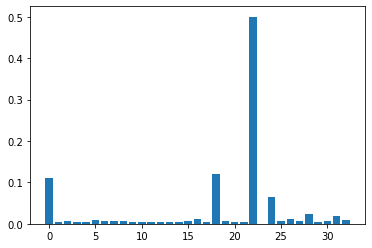

In [21]:
print('Initializing xgboost.sklearn.XGBClassifier and starting training...')

st = datetime.now()

clf = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=20, 
    gamma=10, 
    n_estimators=500)

clf.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=True)

print(datetime.now()-st)

y_pred = clf.predict(X_test)
submission_file_name = 'sample_submission'

accuracy = accuracy_score(np.array(y_test).flatten(), y_pred)
print("Accuracy: %.10f%%" % (accuracy * 100.0))
submission_file_name = submission_file_name + ("_Accuracy_%.6f" % (accuracy * 100)) + '_'

accuracy_per_roc_auc = roc_auc_score(np.array(y_test).flatten(), y_pred)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))
submission_file_name = submission_file_name + ("_ROC-AUC_%.6f" % (accuracy_per_roc_auc * 100))

final_pred = pd.DataFrame(clf.predict_proba(np.array(finalTest)))
dataSub = pd.concat([test_member_id, final_pred.loc[:, 1:2]], axis=1)
dataSub.rename(columns={1:'loan_status'}, inplace=True)
print('%s'%(submission_file_name))
dataSub.to_csv((('%s.csv') % (submission_file_name)), index=False)

import matplotlib.pyplot as plt
print(clf.feature_importances_)
idx = 0
for x in list(finalTrain):
    print('%d %s' % (idx, x))
    idx = idx + 1
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()